In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
ddl.__version__

'0.0.26'

In [4]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [5]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [6]:
# already populated because i ran through the whole notebook without realizing the mistake in sanger bcr barcodes not matching up
bdata = sc.read_h5ad('h5ad/combined_dec_bcells.h5ad')

In [7]:
bdata

AnnData object with n_obs × n_vars = 74019 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [8]:
vdj = ddl.read_h5('dandelion_output/combined_dec_vdj_bcells.h5')
vdj

Dandelion class object with n_obs = 43841 and n_contigs = 89171
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_star

In [9]:
# do a simple transfer
ddl.tl.clone_size(vdj)
ddl.tl.clone_size(vdj, max_size = 3)
ddl.tl.transfer(bdata, vdj)

In [10]:
bdata = bdata[~(bdata.obs['Status_on_day_collection_summary'].isin(['LPS', 'Non_covid']))]
bdata

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


View of AnnData object with n_obs × n_vars = 69683 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2', 'clone_id', 'clone_id_by_size', 'isotype', 'lightchain', 'status', 'vdj_status', 'productive', 'umi_counts_heavy', 'umi_counts_light', 'v_call_heavy', 'v_call_light', 'j_call_heavy', 'j_call_light', 'c_call_heavy', 'c_call_light', 'clone_id_size', 'clone_id_size_max_3'
    var: 'feature_typ

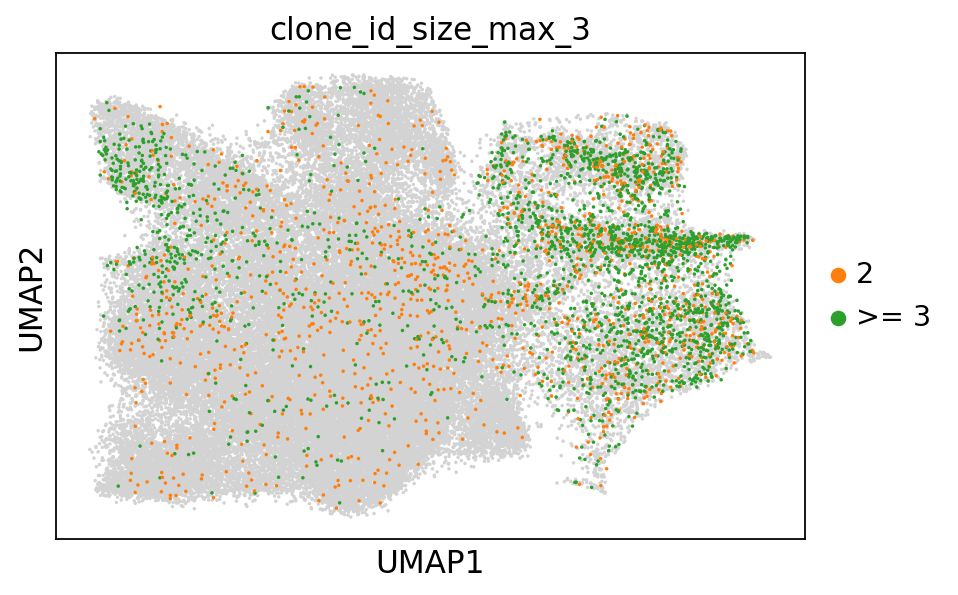

In [15]:
sc.set_figure_params(figsize=(6,4), dpi_save = 900)
sc.pl.umap(bdata, color = 'clone_id_size_max_3', groups = ['2', '>= 3'], size = 10, save = '/Bcell_clone_size.pdf')